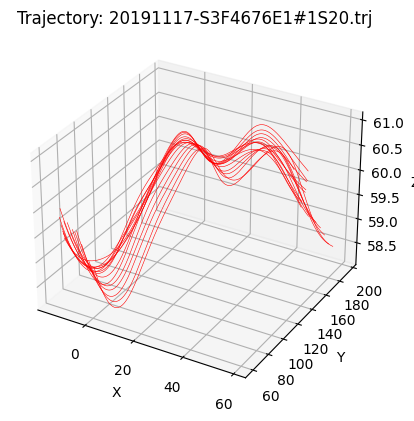

In [2]:
# Import other necessary modules here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Define the read_trj_data function here
from trj_data_utils import read_trj_data

# Set the filename
filename = "20191117-S3F4676E1#1S20.trj"

# Read the trajectory data
data = read_trj_data(filename)

# Create the 3D plot
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-60)

# Plot the trajectories
for trj in data:
    if len(trj) < 10:
        continue
    X = []
    Y = []
    Z = []
    for x in trj:
        X.append(x[2])
        Y.append(x[3])
        Z.append(x[4])
    ax.plot3D(X, Y, Z, 'red', linewidth=0.4)

# Set the plot title and labels
ax.set_title('Trajectory: ' + filename)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.grid(True)
plt.show()


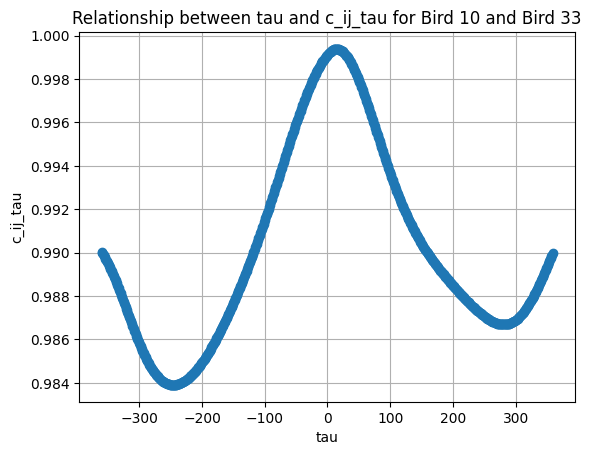

In [3]:
from correlation_delay import calculate_correlation_pairs_multiple_tau, calculate_directional_correlation_delay

bird_i = 10  # Index of bird i
bird_j = 33  # Index of bird j
tau_values = list(range(-60*6, 60*6, 1))  # List of tau values from -60*6 to 60*6 with interval of 10

# calculate_directional_correlation_delay(data, bird_i, bird_j, 0)

c_ij_values = calculate_correlation_pairs_multiple_tau(data, bird_i, bird_j, tau_values)[bird_i, bird_j]

plt.plot(tau_values, c_ij_values, marker='o')
plt.xlabel('tau')
plt.ylabel('c_ij_tau')
plt.title(f'Relationship between tau and c_ij_tau for Bird {bird_i} and Bird {bird_j}')
plt.grid(True)
plt.show()


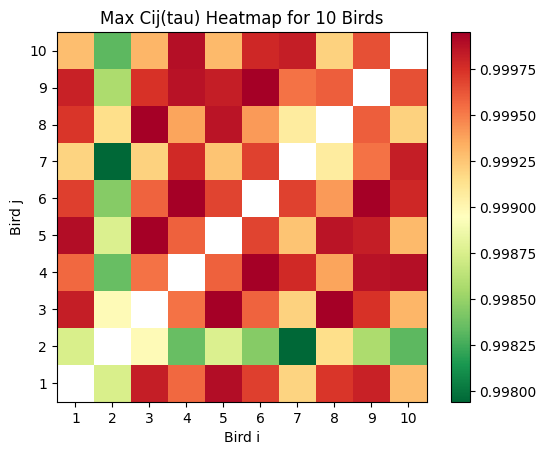

Max tau for Bird 1 and Bird 2: 34.0
Max tau for Bird 1 and Bird 3: 7.0
Max tau for Bird 1 and Bird 4: 34.0
Max tau for Bird 1 and Bird 5: 6.0
Max tau for Bird 1 and Bird 6: 27.0
Max tau for Bird 1 and Bird 7: 46.0
Max tau for Bird 1 and Bird 8: 14.0
Max tau for Bird 1 and Bird 9: 19.0
Max tau for Bird 1 and Bird 10: 42.0
Max tau for Bird 2 and Bird 3: -34.0
Max tau for Bird 2 and Bird 4: -9.0
Max tau for Bird 2 and Bird 5: -34.0
Max tau for Bird 2 and Bird 6: -14.0
Max tau for Bird 2 and Bird 7: 2.0
Max tau for Bird 2 and Bird 8: -27.0
Max tau for Bird 2 and Bird 9: -21.0
Max tau for Bird 2 and Bird 10: -1.0
Max tau for Bird 3 and Bird 4: 28.0
Max tau for Bird 3 and Bird 5: -2.0
Max tau for Bird 3 and Bird 6: 20.0
Max tau for Bird 3 and Bird 7: 40.0
Max tau for Bird 3 and Bird 8: 8.0
Max tau for Bird 3 and Bird 9: 12.0
Max tau for Bird 3 and Bird 10: 37.0
Max tau for Bird 4 and Bird 5: -29.0
Max tau for Bird 4 and Bird 6: -8.0
Max tau for Bird 4 and Bird 7: 13.0
Max tau for Bird 4 and 

In [11]:
import numpy as np

num_birds = 10  # Number of birds
tau_values = list(range(-60 * 2, 60 * 2, 1))  # List of tau values from -60*2 to 60*2 with interval of 1

# Create a 2D numpy array to store the maximum Cij(tau) values and corresponding tau values
heatmap_data = np.zeros((num_birds, num_birds))
tau_max_data = np.zeros((num_birds, num_birds))

# Calculate the maximum Cij(tau) values and corresponding tau values for each pair of birds
for bird_i in range(num_birds):
    for bird_j in range(bird_i + 1, num_birds):
        correlation_pairs = calculate_correlation_pairs_multiple_tau(data, bird_i, bird_j, tau_values)
        c_ij_values = correlation_pairs[(bird_i, bird_j)]
        max_c_ij_tau = max(c_ij_values)
        max_tau_index = c_ij_values.index(max_c_ij_tau)
        max_tau = tau_values[max_tau_index]
        heatmap_data[bird_i, bird_j] = max_c_ij_tau
        heatmap_data[bird_j, bird_i] = max_c_ij_tau  # Fill in the symmetric entry
        tau_max_data[bird_i, bird_j] = max_tau
        tau_max_data[bird_j, bird_i] = max_tau  # Fill in the symmetric entry

# Set the diagonal elements to NaN to exclude them from colormap
np.fill_diagonal(heatmap_data, np.nan)

# Define the minimum and maximum values of the heatmap excluding NaN values
vmin = np.nanmin(heatmap_data)
vmax = np.nanmax(heatmap_data)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap using the 'imshow' function and specify colormap and normalization range
heatmap = ax.imshow(heatmap_data[::-1, :], cmap='RdYlGn_r', vmin=vmin, vmax=vmax)

# Add a colorbar to the heatmap
cbar = plt.colorbar(heatmap)

# Set the x-axis and y-axis labels
ax.set_xticks(np.arange(num_birds))
ax.set_yticks(np.arange(num_birds))
ax.set_xticklabels(np.arange(num_birds) + 1)
ax.set_yticklabels(np.arange(num_birds, 0, -1))  # Reverse the y-axis labels
plt.xlabel('Bird i')
plt.ylabel('Bird j')

# Set the title of the plot
plt.title(f'Max Cij(tau) Heatmap for {num_birds} Birds')

# Display the plot
plt.show()

# Print the tau value at which Cij(tau) is maximum for each pair of birds
for bird_i in range(num_birds):
    for bird_j in range(bird_i + 1, num_birds):
        max_tau = tau_max_data[bird_i, bird_j]
        print(f"Max tau for Bird {bird_i+1} and Bird {bird_j+1}: {max_tau}")

# Bird Relationships

The relationships among the birds are as follows:

## Bird 1
- Strong Relationship (SR) with Bird 3 and Bird 5.
- Normal Relationship (NR) with Bird 9.
- Weak Relationships (WR) with Bird 4, Bird 6, and Bird 8.

## Bird 2
- Not related to any other bird.

## Bird 3
- Strong Relationship (SR) Bird 8.
- Weak Relationship (WR) with Bird 9.

## Bird 4
- Normal Relationship (NR) Bird 10.
- Weak Relationships (WR) and Bird 7.

## Bird 5
- Strong Relationship (SR) with Bird 3.
- Normal Relationship (NR) with Bird 8.
- Weak Relationship (WR) with Bird 4 and Bird 9.

## Bird 6
- Strong Relationship (SR) with Bird 4.
- Weak Relationships (WR) with Bird 7 and Bird 10.

## Bird 7
- Not related to any other bird.

## Bird 8
- Weak Relationship (WR) with Bird 9.

## Bird 9
- Strong Relationship (SR) with Bird 6.
- Normal Relationship (NR) with Bird 4.
- Weak Relationship (WR) with Bird 10.

## Bird 10
- Normal Relationship (NR) with Bird 7.



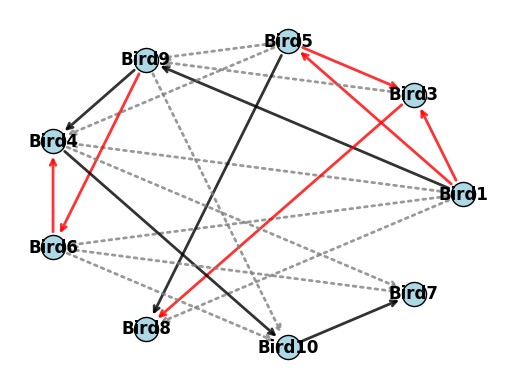

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new directed graph
G = nx.DiGraph()

# Add edges with weights and colors
G.add_edge('Bird1', 'Bird3', weight=1, color='red')  # SR
G.add_edge('Bird1', 'Bird5', weight=1, color='red')  # SR
G.add_edge('Bird1', 'Bird9', weight=1, color='black')  # NR
G.add_edge('Bird1', 'Bird4', weight=1, color='grey')  # WR
G.add_edge('Bird1', 'Bird6', weight=1, color='grey')  # WR
G.add_edge('Bird1', 'Bird8', weight=1, color='grey')  # WR

G.add_edge('Bird3', 'Bird8', weight=1, color='red')  # SR
G.add_edge('Bird3', 'Bird9', weight=1, color='grey')  # WR

G.add_edge('Bird4', 'Bird10', weight=1, color='black')  # NR
G.add_edge('Bird4', 'Bird7', weight=1, color='grey')  # WR

G.add_edge('Bird5', 'Bird3', weight=1, color='red')  # SR
G.add_edge('Bird5', 'Bird8', weight=1, color='black')  # NR
G.add_edge('Bird5', 'Bird4', weight=1, color='grey')  # WR
G.add_edge('Bird5', 'Bird9', weight=1, color='grey')  # WR

G.add_edge('Bird6', 'Bird4', weight=1, color='red')  # SR
G.add_edge('Bird6', 'Bird7', weight=1, color='grey')  # WR
G.add_edge('Bird6', 'Bird10', weight=1, color='grey')  # WR

G.add_edge('Bird9', 'Bird6', weight=1, color='red')  # SR
G.add_edge('Bird9', 'Bird4', weight=1, color='black')  # NR
G.add_edge('Bird9', 'Bird10', weight=1, color='grey')  # WR

G.add_edge('Bird10', 'Bird7', weight=1, color='black')  # NR

# Get weights and scale them to use for edge thickness
weights = [G[u][v]['weight'] for u, v in G.edges()]
weights = [w / max(weights) * 2 for w in weights]  # scale to make the lines visible

# Get colors and line styles
colors = [G[u][v]['color'] for u, v in G.edges()]
styles = ['solid' if color == 'red' or color == 'black' else 'dotted' for color in colors]

# Draw nodes with circular shape
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_shape='o', node_color='lightblue', edgecolors='black')

# Draw edges with color, thickness, and line style
nx.draw_networkx_edges(G, pos, edge_color=colors, width=weights, style=styles, arrowstyle='<-',
                       arrowsize=10, node_size=500, alpha=0.8)

# Draw labels
nx.draw_networkx_labels(G, pos, font_color='black', font_weight='bold')

plt.axis('off')
plt.show()
